<a href="https://colab.research.google.com/github/iamhannahkoh/DeepLearning/blob/main/Natural_Language_Generation_Poetry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Natural Language Generation

In this exercise, we will work with a dataset of Irish sonnet to demonstrate how to generate text using RNN models. You can find the dataset here: https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

### 1. Set up data

In [ ]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2021-01-08 07:47:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.128, 142.250.73.208, 172.217.15.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2021-01-08 07:47:20 (139 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



### 2. Modeling

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [ ]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 16s 12ms/step - loss: 7.3123 - accuracy: 0.0211
Epoch 2/100
484/484 [==============================] - 6s 12ms/step - loss: 6.4955 - accuracy: 0.0228
Epoch 3/100
484/484 [==============================] - 6s 12ms/step - loss: 6.4084 - accuracy: 0.0235
Epoch 4/100
484/484 [==============================] - 6s 12ms/step - loss: 6.3078 - accuracy: 0.0256
Epoch 5/100
484/484 [==============================] - 6s 12ms/step - loss: 6.1515 - accuracy: 0.0354
Epoch 6/100
484/484 [==============================] - 6s 12ms/step - loss: 6.0692 - accuracy: 0.0399
Epoch 7/100
484/484 [==============================] - 6s 12ms/step - loss: 5.9953 - accuracy: 0.0407
Epoch 8/100
484/484 [==============================] - 6s 12ms/step - loss: 5.9012 - accuracy: 0.0462
Epoch 9/100
484/484 [==============================] - 6s 12ms/step - loss: 5.8068 - accuracy: 0.0513
Epoch 10/100
484/484 [==============================] - 6s 12ms/step - loss: 5.70

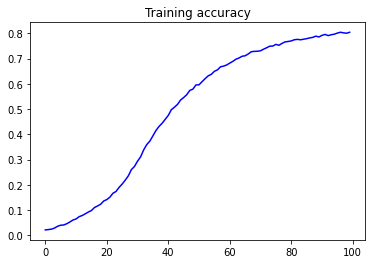

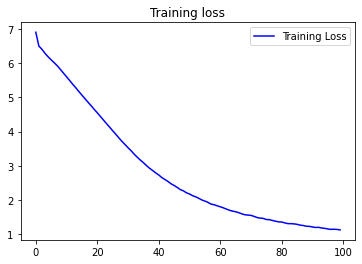

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

### 3. Generate texts

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Help me Obi Wan Kenobi, you're my only hope be respect move twain twain sit twain worth by beauty so kind ' bright young young leaves prove worth do love me so strong hate rhyme right shown shown 'will ' live young leaves thee so bright not nothing down to cross grow mad strange wit mad strange commend commend clearer light wind quite nearly grow'st grow'st hate bettering days leaves slow about glory die heaven behold alone have so 'will ' see so ' call thee to thy breast are so view so near ever that you lies so near mine eyes be mine eyes be mine eyes be


Help me Obi Wan Kenobi, you're my only hope be respect move twain twain sit twain worth by beauty so kind ' bright young young leaves prove worth do love me so strong hate rhyme right shown shown 'will ' live young leaves thee so bright not nothing down to cross grow mad strange wit mad strange commend commend clearer light wind quite nearly grow'st grow'st hate bettering days leaves slow about glory die heaven behold alone have so 'will ' see so ' call thee to thy breast are so view so near ever that you lies so near mine eyes be mine eyes be mine eyes be

Data source: DeepLearning.AI TensorFlow Developer Professional Certificate Specialization on Coursera